# Datenbereinigung

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import os
import re


In [64]:
filename1 = 'data/2019/Unfallorte2019_LinRef.txt'
filename2 = 'data/2018/Unfallorte2018_LinRef.txt'
filename3 = 'data/2017/Unfallorte2017_LinRef.txt'
filename4 = 'data/2016/Unfallorte_2016_LinRef.txt'

In [65]:
df_2019 = pd.read_csv(filename1, delimiter=';',decimal=',')

In [66]:
df_2018 = pd.read_csv(filename2, delimiter=';',decimal=',')

In [67]:
df_2017 = pd.read_csv(filename3, delimiter=';',decimal=',')

In [68]:
df_2016 = pd.read_csv(filename4, delimiter=';',decimal=',')

In [69]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268370 entries, 0 to 268369
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   OBJECTID     268370 non-null  int64 
 1   ULAND        268370 non-null  int64 
 2   UREGBEZ      268370 non-null  int64 
 3   UKREIS       268370 non-null  int64 
 4   UGEMEINDE    268370 non-null  int64 
 5   UJAHR        268370 non-null  int64 
 6   UMONAT       268370 non-null  int64 
 7   USTUNDE      268370 non-null  int64 
 8   UWOCHENTAG   268370 non-null  int64 
 9   UKATEGORIE   268370 non-null  int64 
 10  UART         268370 non-null  int64 
 11  UTYP1        268370 non-null  int64 
 12  ULICHTVERH   268370 non-null  int64 
 13  IstRad       268370 non-null  int64 
 14  IstPKW       268370 non-null  int64 
 15  IstFuss      268370 non-null  int64 
 16  IstKrad      268370 non-null  int64 
 17  IstGkfz      268370 non-null  int64 
 18  IstSonstige  268370 non-null  int64 
 19  LI

In [8]:
df_2019.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND
count,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.0,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.000000,268370.00000,268370.000000,268370.000000,268370.000000
mean,134185.500000,7.282833,2.853404,41.665525,63.106573,2019.0,6.701714,13.249048,4.104196,2.793207,3.891117,3.844640,0.441573,0.277784,0.804162,0.094262,0.13841,0.050143,0.098878,0.282185
std,77471.890209,3.585170,2.457828,25.923244,107.834334,0.0,3.266014,4.786792,1.867870,0.428173,2.560706,2.116382,0.796565,0.447907,0.396845,0.292193,0.34533,0.218241,0.298499,0.490314
min,1.000000,1.000000,0.000000,1.000000,0.000000,2019.0,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,67093.250000,5.000000,1.000000,15.000000,0.000000,2019.0,4.000000,10.000000,3.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,134185.500000,7.000000,3.000000,41.000000,16.000000,2019.0,7.000000,14.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,201277.750000,9.000000,4.000000,62.000000,89.000000,2019.0,9.000000,17.000000,6.000000,3.000000,5.000000,6.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,268370.000000,16.000000,9.000000,91.000000,718.000000,2019.0,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.000000


In [9]:
df_2019.rename(columns={'IstSonstige': 'IstSonstig'}, inplace=True)

In [70]:
#Versuch Kommas und Punkte zu tauschen -> funktioniert nicht bei Objects, deshalb direkt richtig einlesen mit decimal=,
df_2019.apply(lambda x: x.str.replace(',','.'))

AttributeError: Can only use .str accessor with string values!

In [ ]:
df_2018.info()

In [ ]:
df_2018.rename(columns={'OBJECTID_1': 'OBJECTID'}, inplace=True)

In [11]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195229 entries, 0 to 195228
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    195229 non-null  int64 
 1   UIDENTSTLA  195229 non-null  object
 2   ULAND       195229 non-null  int64 
 3   UREGBEZ     195229 non-null  int64 
 4   UKREIS      195229 non-null  int64 
 5   UGEMEINDE   195229 non-null  int64 
 6   UJAHR       195229 non-null  int64 
 7   UMONAT      195229 non-null  int64 
 8   USTUNDE     195229 non-null  int64 
 9   UWOCHENTAG  195229 non-null  int64 
 10  UKATEGORIE  195229 non-null  int64 
 11  UART        195229 non-null  int64 
 12  UTYP1       195229 non-null  int64 
 13  IstRad      195229 non-null  int64 
 14  IstPKW      195229 non-null  int64 
 15  IstFuss     195229 non-null  int64 
 16  IstKrad     195229 non-null  int64 
 17  IstSonstig  195229 non-null  int64 
 18  LICHT       195229 non-null  int64 
 19  STRZUSTAND  195229 non-

In [12]:
df_2017.drop(df_2017.columns[1], axis=1, inplace=True)

In [13]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195229 entries, 0 to 195228
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    195229 non-null  int64 
 1   ULAND       195229 non-null  int64 
 2   UREGBEZ     195229 non-null  int64 
 3   UKREIS      195229 non-null  int64 
 4   UGEMEINDE   195229 non-null  int64 
 5   UJAHR       195229 non-null  int64 
 6   UMONAT      195229 non-null  int64 
 7   USTUNDE     195229 non-null  int64 
 8   UWOCHENTAG  195229 non-null  int64 
 9   UKATEGORIE  195229 non-null  int64 
 10  UART        195229 non-null  int64 
 11  UTYP1       195229 non-null  int64 
 12  IstRad      195229 non-null  int64 
 13  IstPKW      195229 non-null  int64 
 14  IstFuss     195229 non-null  int64 
 15  IstKrad     195229 non-null  int64 
 16  IstSonstig  195229 non-null  int64 
 17  LICHT       195229 non-null  int64 
 18  STRZUSTAND  195229 non-null  int64 
 19  LINREFX     195229 non-

In [14]:
df_2017.rename(columns={'LICHT': 'ULICHTVERH'}, inplace=True)

In [15]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151673 entries, 0 to 151672
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   FID         151673 non-null  int64 
 1   OBJECTID    151673 non-null  int64 
 2   ULAND       151673 non-null  int64 
 3   UREGBEZ     151673 non-null  int64 
 4   UKREIS      151673 non-null  int64 
 5   UGEMEINDE   151673 non-null  int64 
 6   UJAHR       151673 non-null  int64 
 7   UMONAT      151673 non-null  int64 
 8   USTUNDE     151673 non-null  int64 
 9   UWOCHENTAG  151673 non-null  int64 
 10  UKATEGORIE  151673 non-null  int64 
 11  UART        151673 non-null  int64 
 12  UTYP1       151673 non-null  int64 
 13  ULICHTVERH  151673 non-null  int64 
 14  IstStrasse  151673 non-null  int64 
 15  IstRad      151673 non-null  int64 
 16  IstPKW      151673 non-null  int64 
 17  IstFuss     151673 non-null  int64 
 18  IstKrad     151673 non-null  int64 
 19  IstGkfz     151673 non-

In [16]:
#Löschen der Spalten, die nicht mit den anderen übereinstimmen
df_2016.drop('FID', axis=1, inplace=True)

In [17]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151673 entries, 0 to 151672
Data columns (total 24 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   OBJECTID    151673 non-null  int64 
 1   ULAND       151673 non-null  int64 
 2   UREGBEZ     151673 non-null  int64 
 3   UKREIS      151673 non-null  int64 
 4   UGEMEINDE   151673 non-null  int64 
 5   UJAHR       151673 non-null  int64 
 6   UMONAT      151673 non-null  int64 
 7   USTUNDE     151673 non-null  int64 
 8   UWOCHENTAG  151673 non-null  int64 
 9   UKATEGORIE  151673 non-null  int64 
 10  UART        151673 non-null  int64 
 11  UTYP1       151673 non-null  int64 
 12  ULICHTVERH  151673 non-null  int64 
 13  IstStrasse  151673 non-null  int64 
 14  IstRad      151673 non-null  int64 
 15  IstPKW      151673 non-null  int64 
 16  IstFuss     151673 non-null  int64 
 17  IstKrad     151673 non-null  int64 
 18  IstGkfz     151673 non-null  int64 
 19  IstSonstig  151673 non-

In [18]:
df_2016.rename(columns={'IstStrasse': 'STRZUSTAND'}, inplace=True)

In [19]:
# new dataframe (alle Jahre)
dfs = [df_2016, df_2017, df_2018, df_2019]
df_concat = pd.concat(dfs)

In [20]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827140 entries, 0 to 268369
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   OBJECTID    615272 non-null  float64
 1   ULAND       827140 non-null  int64  
 2   UREGBEZ     827140 non-null  int64  
 3   UKREIS      827140 non-null  int64  
 4   UGEMEINDE   827140 non-null  int64  
 5   UJAHR       827140 non-null  int64  
 6   UMONAT      827140 non-null  int64  
 7   USTUNDE     827140 non-null  int64  
 8   UWOCHENTAG  827140 non-null  int64  
 9   UKATEGORIE  827140 non-null  int64  
 10  UART        827140 non-null  int64  
 11  UTYP1       827140 non-null  int64  
 12  ULICHTVERH  827140 non-null  int64  
 13  STRZUSTAND  827140 non-null  int64  
 14  IstRad      827140 non-null  int64  
 15  IstPKW      827140 non-null  int64  
 16  IstFuss     827140 non-null  int64  
 17  IstKrad     827140 non-null  int64  
 18  IstGkfz     631911 non-null  float64
 19  Is

In [21]:
df_concat.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,OBJECTID_1
count,615272.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,...,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,827140.000000,631911.000000,827140.000000,211868.000000
mean,108197.783697,7.485727,2.780850,41.650878,74.444528,2017.721686,6.719216,13.267426,4.100752,2.790679,...,3.844081,0.436658,0.282557,0.260616,0.810794,0.088249,0.143469,0.051327,0.109625,105934.500000
std,68458.644542,3.522928,2.251166,25.728318,114.846793,1.102954,3.235969,4.805245,1.870905,0.431494,...,2.120376,0.793444,0.500551,0.438971,0.391673,0.283656,0.350551,0.220664,0.312422,61161.167754
min,1.000000,1.000000,0.000000,1.000000,0.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,51273.000000,5.000000,1.000000,16.000000,0.000000,2017.000000,4.000000,10.000000,3.000000,3.000000,...,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,52967.750000
50%,102546.000000,8.000000,3.000000,37.000000,22.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,105934.500000
75%,154891.000000,9.000000,4.000000,62.000000,118.000000,2019.000000,9.000000,17.000000,6.000000,3.000000,...,6.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,158901.250000
max,268370.000000,16.000000,9.000000,91.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,...,7.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,211868.000000


In [22]:
df_fahrrad = df_concat.loc[(df_concat['IstRad'] == 1) & (df_concat['ULAND']==2)]

In [23]:
df_fahrrad.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,OBJECTID_1
count,6696.000000,9019.0,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,...,9019.000000,9019.000000,9019.000000,9019.0,9019.000000,9019.000000,9019.000000,6839.000000,9019.000000,2323.000000
mean,114818.037784,2.0,3.336179,6.573013,348.808848,2017.525225,6.855305,13.233285,4.062535,2.905200,...,3.799867,0.321100,0.227852,1.0,0.681894,0.082271,0.010201,0.020471,0.088480,112685.426604
std,44467.517482,0.0,1.702043,4.626534,168.811413,1.118456,2.949343,4.578789,1.696236,0.297089,...,1.786564,0.699784,0.435806,0.0,0.465767,0.274792,0.100488,0.141615,0.284007,37537.282128
min,6155.000000,2.0,1.000000,1.000000,101.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,6023.000000
25%,96888.250000,2.0,2.000000,3.000000,212.000000,2017.000000,5.000000,9.000000,3.000000,3.000000,...,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,124400.500000
50%,123189.500000,2.0,3.000000,5.000000,320.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,...,3.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,125908.000000
75%,158889.750000,2.0,5.000000,9.000000,508.000000,2019.000000,9.000000,17.000000,5.000000,3.000000,...,6.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,127236.500000
max,163331.000000,2.0,7.000000,20.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,...,7.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,129220.000000


In [60]:
df_fahrrad

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,OBJECTID_1,Bezirke
6188,6189.0,2,6,2,603,2016,4,15,2,3,...,0,0,0.0,0,582353.394399999990000,5926138.468299999800000,10.240903380000001,53.477779904000002,NaN,Bergedorf
6572,6573.0,2,4,2,405,2016,2,15,4,3,...,0,0,0.0,0,565114.366000000040000,5939258.010700000500000,9.983922804000001,53.598103684000002,NaN,Hamburg-Nord
6589,6590.0,2,4,8,418,2016,3,14,6,3,...,1,0,0.0,0,567467.747500000060000,5937257.759899999900000,10.019045340000000,53.579829556000000,NaN,Hamburg-Nord
6606,6607.0,2,3,6,318,2016,3,13,7,3,...,0,0,0.0,0,562842.417900000000000,5941421.184999999600000,9.950033651000000,53.617822046999997,NaN,Eimsbüttel
6695,6696.0,2,2,9,221,2016,1,8,6,3,...,0,0,0.0,0,555294.017299999950000,5936479.404400000300000,9.835057024999999,53.574258757000003,NaN,Altona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163316,163317.0,2,2,5,215,2019,12,0,1,3,...,0,0,0.0,0,561486.715081439350000,5935815.524420011800000,9.928436382000029,53.567602927000053,NaN,Altona
163319,163320.0,2,1,18,139,2019,12,5,7,3,...,0,0,0.0,0,564148.370146343480000,5932462.530353844200000,9.967932663000056,53.537149892000059,NaN,Hamburg-Mitte
163321,163322.0,2,3,2,312,2019,12,15,1,3,...,0,0,0.0,0,565546.308511899780000,5935197.450059652300000,9.989595971000028,53.561556742000050,NaN,Eimsbüttel
163323,163324.0,2,7,14,715,2019,12,7,6,3,...,0,0,0.0,0,556730.151350956410000,5924724.042118394700000,9.854613961000041,53.468452494000076,NaN,Harburg


In [24]:
df_fahrrad.to_csv(r'Merged_csv.csv', index = False, sep=";")

In [25]:
pd.crosstab(df_fahrrad['IstPKW'], df_fahrrad['ULICHTVERH'], rownames=['IstPKW'])

ULICHTVERH,0,1,2
IstPKW,,,
0,2355,127,387
1,4993,319,838


In [26]:
df1.hist()
plt.show()

NameError: name 'df1' is not defined

Text(0.5, 0, 'Bezirke')

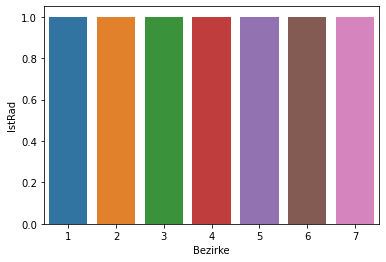

In [27]:
sns.barplot(data=df_fahrrad, x='UREGBEZ', y='IstRad')
plt.xlabel("Bezirke")

In [28]:
bezirke = {1:"Hamburg-Mitte", 2:"Altona", 3:"Eimsbüttel", 4:"Hamburg-Nord", 5:"Wandsbek", 6:"Bergedorf", 7:"Harburg", 9:"andere2", 0:"andere"}

In [29]:
df_concat['UREGBEZ'].apply(lambda x:bezirke[x])

0             andere
1             andere
2             andere
3             andere
4             andere
             ...    
268365    Eimsbüttel
268366    Eimsbüttel
268367    Eimsbüttel
268368    Eimsbüttel
268369    Eimsbüttel
Name: UREGBEZ, Length: 827140, dtype: object

In [30]:
df_concat['Bezirke']=df_concat['UREGBEZ'].apply(lambda x:bezirke[x])

In [31]:
df_concat['UREGBEZ'].unique()

array([0, 7, 1, 6, 3, 4, 2, 5, 9], dtype=int64)

In [32]:
fahrrad.groupby('UREGBEZ').IstRad.sum().plot.bar()
plt.xlabel('bezirke')

NameError: name 'fahrrad' is not defined

In [33]:
df3.head()

NameError: name 'df3' is not defined

In [34]:
plt.bar(bezirke, df1.IstRad.sum())

NameError: name 'df1' is not defined

In [35]:
unfallorte = gpd.read_file("Unfallorte2019_LinRef.shp")

NameError: name 'gpd' is not defined

# Kartendarstellung

In [36]:
# reminder: longitute = x, latitute =y
BBox = ((df_concat['ULAND'=02].XGCSWGS84.min(),   df_concat.XGCSWGS84.max(),      
         df_concat.YGCSWGS84.min(), df_concat.YGCSWGS84.max()))

SyntaxError: invalid syntax (<ipython-input-36-2a9287a15e5f>, line 2)

In [37]:
df_concat.XGCSWGS84.min()


'10.000003033000000'

In [38]:
df_concat.XGCSWGS84.max()

'9.999999366000054'

In [39]:
df_concat.YGCSWGS84.min()

'47.319138696000039'

In [40]:
df_concat.YGCSWGS84.max()

'55.036931810000056'

In [41]:
#Reduktion auf Hamburg
df_fahrrad = df_concat.loc[(df_concat['IstRad'] == 1) & (df_concat['ULAND']==2)]

In [42]:
df_fahrrad.describe()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,UTYP1,ULICHTVERH,STRZUSTAND,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,OBJECTID_1
count,6696.000000,9019.0,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,9019.000000,...,9019.000000,9019.000000,9019.000000,9019.0,9019.000000,9019.000000,9019.000000,6839.000000,9019.000000,2323.000000
mean,114818.037784,2.0,3.336179,6.573013,348.808848,2017.525225,6.855305,13.233285,4.062535,2.905200,...,3.799867,0.321100,0.227852,1.0,0.681894,0.082271,0.010201,0.020471,0.088480,112685.426604
std,44467.517482,0.0,1.702043,4.626534,168.811413,1.118456,2.949343,4.578789,1.696236,0.297089,...,1.786564,0.699784,0.435806,0.0,0.465767,0.274792,0.100488,0.141615,0.284007,37537.282128
min,6155.000000,2.0,1.000000,1.000000,101.000000,2016.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,6023.000000
25%,96888.250000,2.0,2.000000,3.000000,212.000000,2017.000000,5.000000,9.000000,3.000000,3.000000,...,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,124400.500000
50%,123189.500000,2.0,3.000000,5.000000,320.000000,2018.000000,7.000000,14.000000,4.000000,3.000000,...,3.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,125908.000000
75%,158889.750000,2.0,5.000000,9.000000,508.000000,2019.000000,9.000000,17.000000,5.000000,3.000000,...,6.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,127236.500000
max,163331.000000,2.0,7.000000,20.000000,718.000000,2019.000000,12.000000,23.000000,7.000000,3.000000,...,7.000000,2.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,129220.000000


In [43]:
df_fahrrad.XGCSWGS84.min()

'10.000036578000049'

In [44]:
df_fahrrad.XGCSWGS84.max()

'9.999804765000000'

In [45]:
df_fahrrad.YGCSWGS84.min()

'53.397676488000059'

In [46]:
df_fahrrad.YGCSWGS84.max()

'53.719032745000050'

In [47]:
BBox_HH = ((df_fahrrad.XGCSWGS84.min(),   df_fahrrad.XGCSWGS84.max(),      
         df_fahrrad.YGCSWGS84.min(), df_fahrrad.YGCSWGS84.max()))

In [48]:
map = plt.imread('map_HH.png')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

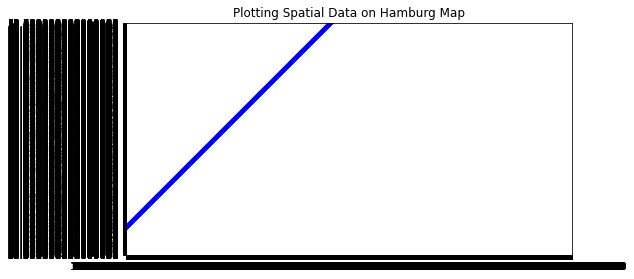

In [49]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df_fahrrad.XGCSWGS84, df_fahrrad.YGCSWGS84, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Hamburg Map')
ax.set_xlim(BBox_HH[0],BBox_HH[1])
ax.set_ylim(BBox_HH[2],BBox_HH[3])
ax.imshow(map, zorder=0, extent = BBox_HH, aspect= 'equal')

Heatmap

In [50]:
int_round_to = 2

In [54]:
df_fahrrad['YGCSWGS84'].astype(str).astype('int64')
df_fahrrad['XGCSWGS84'].astype(str).astype('int64')

ValueError: invalid literal for int() with base 10: '53.477779904000002'

In [56]:
df_fahrrad['lat']=df_fahrrad['YGCSWGS84'].round(int_round_to)
df_fahrrad['long']=df_fahrrad['XGCSWGS84'].round(int_round_to)
df_fahrrad

TypeError: can't multiply sequence by non-int of type 'float'

In [58]:
df_pv = df_fahrrad.pivot_table(index = 'lat', columns = 'lon', values = 'IstRad', aggfunc = np.sum)

KeyError: 'lat'

In [ ]:
plt.subplots(figsize=(12,6))
sns.heatmap(df_pv)